In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%config Inlineblackend.format_figure = 'retina'

In [5]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
data = pd.read_csv(url)
data.head()


,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
0,Afghanistan,1960,NaN,NaN,51.279,32.219,NaN
1,Afghanistan,1961,NaN,NaN,51.373,31.649,NaN
2,Afghanistan,1962,NaN,NaN,51.457,31.093,NaN
3,Afghanistan,1963,NaN,NaN,51.530,30.551,NaN
4,Afghanistan,1964,NaN,NaN,51.589,30.022,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


In [7]:
x_col = 'year'
y_col = 'Death rate, crude (per 1,000 people)'
country = 'Thailand'

In [92]:
df = data[data['country'] == country].copy()

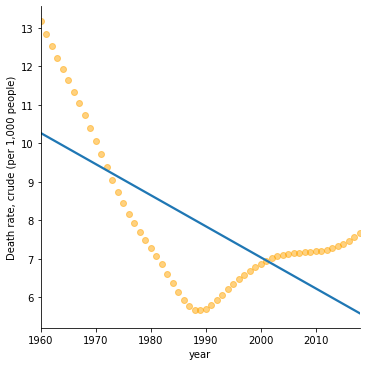

In [15]:
sns.lmplot(x=x_col,y=y_col,data=df , ci=None, scatter_kws = {'color':'orange','alpha' : .5})

# Sklearn 

In [20]:
import sklearn as sk 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [100]:
x = df[['year']]
y = df[['Death rate, crude (per 1,000 people)']]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = .3 , random_state = 2 )

In [24]:
model = LinearRegression()
model

LinearRegression()

In [25]:
model.fit(x_test,y_test)

LinearRegression()

In [26]:
model.intercept_

array([170.94628153])

In [27]:
model.score(x_test,y_test) # r-square 

0.4336078737399819

In [94]:
model.score(x_train,y_train)

0.48919176484410243

In [29]:
model.predict(x_test)

array([[ 6.61427407],
       [ 8.0069182 ],
       [ 7.51539674],
       [ 5.79507164],
       [ 8.49843965],
       [ 6.45043358],
       [ 8.08883844],
       [10.38260524],
       [ 7.92499795],
       [10.300685  ],
       [ 5.95891212],
       [ 6.04083236],
       [ 9.64532306],
       [ 9.56340281],
       [ 9.31764208],
       [ 8.17075868],
       [ 5.87699188],
       [ 7.4334765 ]])

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

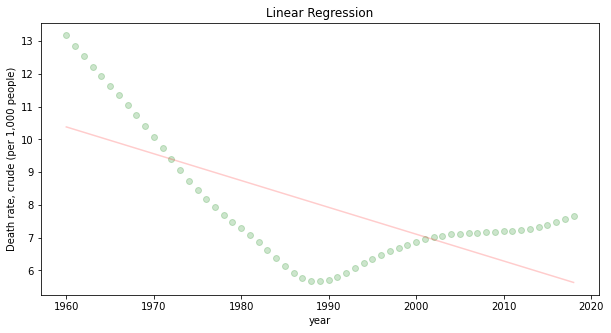

In [39]:
fig = plt.figure(figsize = (10,5))
plt.scatter(x,y,color='green',alpha = .2)
plt.plot(x,model.predict(x),color = 'r',alpha = .2)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [70]:
x = model.predict([[2020]])

In [76]:
poly = PolynomialFeatures(degree = 2 ) # 

In [78]:
poly.fit_transform([[1990]])

array([[1.0000e+00, 1.9900e+03, 3.9601e+06]])

In [79]:
x_train[:3]

,year
14032,2009
14000,1977
14040,2017


In [1]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

NameError: name 'poly' is not defined

In [2]:
model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train) 

NameError: name 'LinearRegression' is not defined

In [84]:
model_poly.intercept_

array([21121.60428284])

In [88]:
model_poly.score(x_test_poly,y_test)

0.9487834795266313

In [97]:
model_poly.score(x_train_poly,y_train)

0.94335926673283

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

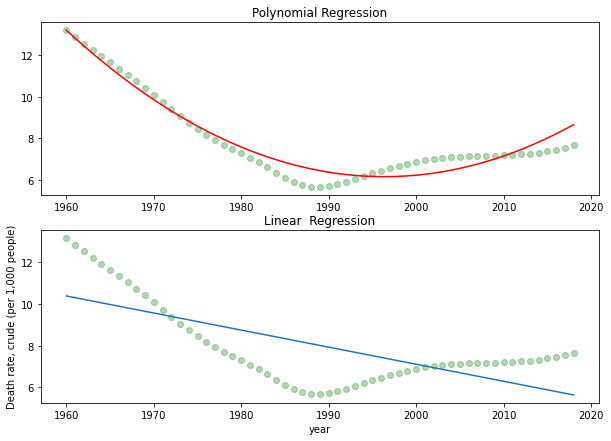

In [173]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize =(10,7))
ax1.scatter(x,y,color='green',alpha = .3)
ax1.plot(x,model_poly.predict(poly.fit_transform(x)), color = 'red')
ax1.set_title('Polynomial Regression')
ax2.scatter(x,y,color='green',alpha = .3)
ax2.plot(x,model.predict(x))
ax2.set_title('Linear  Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)


In [ ]:
fig,axs = plt.subplots(1,2,figsize =(15,7))
axs[0].scatter(x,y,color='green',alpha = .3)
axs[0].plot(x,model_poly.predict(poly.fit_transform(x)), color = 'red')
axs[0].set_xlabel(x_col)
axs[0].set_label(y_col)
axs[0].set_title('Polynomial Regression')
axs[1].scatter(x,y,color='green',alpha = .3)
axs[1].plot(x,model.predict(x))
axs[1].set_xlabel(x_col)
axs[1].set_label(y_col)
axs[1].set_title('Polynomial Regression')
